In [1]:
# Extract one month of variables from OCO-2 dataset, for Europe only
%run tools.ipynb

In [2]:
# names of variables need to extract 
var_names  = ['xco2', 
              'psurf', 
              'xco2_averaging_kernel',
              'co2_profile_apriori',
              'pressure_weight',
              'xco2_uncertainty',
              'operation_mode']
# input file
input_file = '/geos/u73/msadiq/satellite/oco-2/OCO2_b91_10sec_GOOD_r24.nc4'
# output
output_dir = '/geos/u73/msadiq/satellite/oco-2/'


In [3]:
%%time

year = 2016
month = 6

# first and last day for extraction
if(month == 12):
    first_day = str(year) + '-' + month_string(month) + '-01'
    last_day_p1 = str(year+1) + '-01-01' # last day plus 1
    # ourput file name
    output_file = output_dir + 'EU_OCO2_extract_' + str(year) + month_string(month) + '.nc'
else:
    first_day = str(year) + '-' + month_string(month) + '-01'
    last_day_p1 = str(year) + '-' + month_string(month+1) + '-01' # last day plus 1
    # output file name
    output_file = output_dir + 'EU_OCO2_extract_' + str(year) + month_string(month) + '.nc'

# convert time input to match the format of sound_id in OCO-2 data, 20160601000000
first_day_digital = re.sub("[^0-9]", "", first_day)
last_day_p1_digital = re.sub("[^0-9]", "", last_day_p1)
begin = int(first_day_digital + '000000')  # begin and end of time slice we want to look at
end = int(last_day_p1_digital + '000000')  # OCO-2 format

# open dataset
ds = xr.open_dataset(input_file, engine='netcdf4')
# get a slice of data within begin and end time
ds_slice = ds.sel(sounding_id=slice(begin,end)) # xarray Dataset
lon_series = ds_slice['longitude']              # lon and lat position, 1d
lat_series = ds_slice['latitude']
sound_id   = ds_slice['sounding_id']            # sound id, 1d
sigma      = ds['sigma_levels']                 # sigma levels, 20 values
# position dataframe, used in for loops to locate, seems faster
df_position = pd.DataFrame({'sound_id': sound_id, 
                            'lon': lon_series, 
                            'lat': lat_series})

# create target dataset to map to
target_file = '/geos/d21/msadiq/TNO-GHGco/gridded/TNO_2010_0.25x0.3125.nc'
ds_tmp = xr.open_dataset(target_file)
lat = ds_tmp.lat.values
lon = ds_tmp.lon.values
lat_res = ds_tmp.lat[10].values - ds_tmp.lat[9].values
lon_res = ds_tmp.lon[10].values - ds_tmp.lon[9].values
day_1   = np.array(first_day,dtype='datetime64[D]')
day_end = np.array(last_day_p1,dtype='datetime64[D]')
days    = np.arange(day_1, day_end, dtype='datetime64[D]') # time dimension of output

# get subset of OCO-2 data covering the target area
lat_min = min(lat) - 0.5*lat_res
lat_max = max(lat) + 0.5*lat_res
lon_min = min(lon) - 0.5*lon_res
lon_max = max(lon) + 0.5*lon_res
df_slice_lat = df_position[df_position['lat'].between(lat_min, lat_max, inclusive=True)]
df_position_new = df_slice_lat[df_slice_lat['lon'].between(lon_min, lon_max, inclusive=True)]
print('length of data in this data over Europe:', len(df_position_new))
isound = df_position_new['sound_id'].values
#isound_str = str(isound)
#date_string = isound_str[0:4] + '-' + isound_str[4:6] + '-' + isound_str[6:8]
ds_slice = ds.sel(sounding_id=isound)
ds_slice

length of data in this data over Europe: 2197
CPU times: user 406 ms, sys: 45.8 ms, total: 452 ms
Wall time: 697 ms


<xarray.Dataset>
Dimensions:                       (epoch_dimension: 7, levels: 20, sounding_id: 2197)
Coordinates:
  * sounding_id                   (sounding_id) int64 20160601091302 ... 20160630134131
Dimensions without coordinates: epoch_dimension, levels
Data variables:
    test_flag                     (sounding_id) int8 ...
    latitude                      (sounding_id) float32 ...
    longitude                     (sounding_id) float32 ...
    data_type                     (sounding_id) int8 ...
    date                          (sounding_id, epoch_dimension) int16 ...
    time                          (sounding_id) datetime64[ns] ...
    solar_zenith_angle            (sounding_id) float32 ...
    solar_azimuth_angle           (sounding_id) float32 ...
    sensor_zenith_angle           (sounding_id) float32 ...
    sensor_azimuth_angle          (sounding_id) float32 ...
    psurf_apriori_b8              (sounding_id) float32 ...
    psurf_apriori_o2a             (sounding_id) float32 ...
    psurf_apriori_wco2            (sounding_id) float32 ...
    psurf_apriori_sco2            (sounding_id) float32 ...
    psurf_apriori                 (sounding_id) float32 ...
    psurf                         (sounding_id) float32 ...
    xco2_raw                      (sounding_id) float32 ...
    xco2_apriori                  (sounding_id) float32 ...
    xco2                          (sounding_id) float32 ...
    xco2_uncertainty              (sounding_id) float32 ...
    model_error                   (sounding_id) float32 ...
    co2_profile_apriori           (sounding_id, levels) float32 ...
    xco2_averaging_kernel         (sounding_id, levels) float32 ...
    pressure_weight               (sounding_id, levels) float32 ...
    sigma_levels                  (levels) float32 ...
    xco2_quality_flag             (sounding_id) int8 ...
    warn_level                    (sounding_id) int8 ...
    land_fraction                 (sounding_id) int8 ...
    altitude                      (sounding_id) float32 ...
    airmass                       (sounding_id) float32 ...
    path                          (sounding_id) int16 ...
    operation_mode                (sounding_id) int8 ...
    land_water_indicator          (sounding_id) int8 ...
    surface_type                  (sounding_id) int8 ...
    fs                            (sounding_id) float32 ...
    delta_windspeed               (sounding_id) float32 ...
    s31                           (sounding_id) float32 ...
    s32                           (sounding_id) float32 ...
    albedo_3                      (sounding_id) float32 ...
    albedo_slope_3                (sounding_id) float32 ...
    aod_total                     (sounding_id) float32 ...
    albedo_2                      (sounding_id) float32 ...
    co2_grad_del                  (sounding_id) float32 ...
    dws                           (sounding_id) float32 ...
    dpfrac                        (sounding_id) float32 ...
    dp_o2a                        (sounding_id) float32 ...
    dp                            (sounding_id) float32 ...
    dp_abp                        (sounding_id) float32 ...
    co2_ratio                     (sounding_id) float32 ...
    h2o_ratio                     (sounding_id) float32 ...
    xco2_weak_idp                 (sounding_id) float32 ...
    xco2_strong_idp               (sounding_id) float32 ...
    tcwv_apriori                  (sounding_id) float32 ...
    tcwv                          (sounding_id) float32 ...
    ice_height                    (sounding_id) float32 ...
    h2o_scale                     (sounding_id) float32 ...
    deltaT                        (sounding_id) float32 ...
    snr_o2a                       (sounding_id) float32 ...
    snr_wco2                      (sounding_id) float32 ...
    snr_sco2                      (sounding_id) float32 ...
    altitude_stddev               (sounding_id) float32 ...
    N_total_shots                 (sounding_id) i

In [4]:
    for ivar in var_names:
        var_slice = ds_slice[ivar]
        if(len(var_slice.dims) < 2):
            oco2[ivar].loc[dict(date = np.datetime64(date_string), lat = ilat, lon = ilon)] = var_slice.mean().values # really close in time and location, get average
        else:
            oco2[ivar].loc[dict(date = np.datetime64(date_string), lat = ilat, lon = ilon)] = var_slice.mean(dim='sounding_id').values

length of dataframe to loop through: 2197
CPU times: user 257 ms, sys: 31.6 ms, total: 288 ms
Wall time: 673 ms


In [270]:
var_3d = xr.DataArray(data = np.nan, dims = ('date', 'lat', 'lon'), 
                      coords = {'date': days, 'lat': ds_tmp.lat, 'lon': ds_tmp.lon},
                      name = 'xco2')

var_4d = xr.DataArray(data = np.nan, dims = ('date', 'lev', 'lat', 'lon'), # same as model order
                      coords = {'date': days, 'lev': ds.sigma_levels.values, 'lat': ds_tmp.lat, 'lon': ds_tmp.lon},
                      name = 'xco2_averaging_kernel')
oco2 = var_4d.to_dataset() # initialise a dataset to store all dataarrays

for ivar in var_names:
    nm_dim = len(ds[ivar].dims)
    if(nm_dim == 1):
        oco2[ivar] = var_3d.copy(deep=True)
    else:
        oco2[ivar] = var_4d.copy(deep=True)


oco2.to_netcdf(output_file)
print('finished mapping for:', year, month)

length of dataframe to loop through: 2197
finished mapping for: 2016 6
CPU times: user 4min 10s, sys: 2.55 s, total: 4min 13s
Wall time: 4min 20s


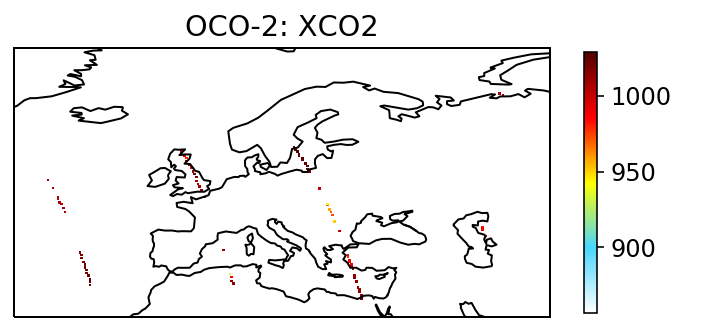

In [271]:
# plot after mapping
fig = plt.figure(figsize=[6, 6])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)
ax.coastlines()
oco2['psurf'].isel(date=5).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.4, 'label': ' '})

ax.set_title('OCO-2: XCO2');

In [272]:
oco2

<xarray.Dataset>
Dimensions:                (date: 30, lat: 181, lev: 20, lon: 289)
Coordinates:
  * date                   (date) datetime64[ns] 2016-06-01 ... 2016-06-30
  * lev                    (lev) float32 1e-04 0.05263158 ... 0.94736844 1.0
  * lat                    (lat) float64 30.0 30.25 30.5 ... 74.5 74.75 75.0
  * lon                    (lon) float64 -30.0 -29.69 -29.38 ... 59.69 60.0
Data variables:
    xco2_averaging_kernel  (date, lev, lat, lon) float64 nan nan nan ... nan nan
    xco2                   (date, lat, lon) float64 nan nan nan ... nan nan nan
    psurf                  (date, lat, lon) float64 nan nan nan ... nan nan nan
    co2_profile_apriori    (date, lev, lat, lon) float64 nan nan nan ... nan nan
    pressure_weight        (date, lev, lat, lon) float64 nan nan nan ... nan nan
    xco2_uncertainty       (date, lat, lon) float64 nan nan nan ... nan nan nan
    operation_mode         (date, lat, lon) float64 nan nan nan ... nan nan nan